# Observed Trend

1. Based on "Temperature and Latitude " scatter plot, the higher latitude the lower temperature. (Latitude between 0 - 20 has the highest average temperature
2. Based on "Humidity vs Latitude" plot, cities around 0 latitude have higher humidity.
3. In "Wind Speed vs Latitude" plot, most of cities between 40 to 60 latitude, thier wind speeds is within 5 to 10 mph.

In [37]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

## Perform API Calls

In [47]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key +"&q="

#Cities weather data frame
df_cities = pd.DataFrame({"City":cities})
df_cities["Temperature(F)"] =""
df_cities["Humidity(%)"] =""
df_cities["Cloudiness(%)"] =""
df_cities["Wind Speed(mph)"] =""
df_cities["Latitude"]=""
df_cities["Longitude"]=""
df_cities.head()
print("Beginning Data Retrieval")
print("------------------------")
#
for index, row in df_cities.iterrows():
    city =row["City"]
    response = requests.get(url+city)
    city_weather = response.json()
    print(f"Processing Record {index} | {city}")
    city_weather_url =response.url
    print(response.url)
    
    try:
        df_cities.loc[index,"Temperature(F)"]=city_weather['main']['temp']
        df_cities.loc[index,"Humidity(%)"]=city_weather['main']['humidity']
        df_cities.loc[index,"Cloudiness(%)"]=city_weather['clouds']['all']
        df_cities.loc[index,"Wind Speed(mph)"]=city_weather['wind']['speed']
        df_cities.loc[index,"Latitude"]=city_weather['coord']['lat']
        df_cities.loc[index,"Longitude"]=city_weather["coord"]['lon']
    except (KeyError, IndexError):
        pass
    
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")
df_cities.head()
#city_weather = requests.get(url +'los angeles').json()
#print(city_weather)

Beginning Data Retrieval
------------------------
Processing Record 0 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=illoqqortoormiut
Processing Record 1 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=hithadhoo
Processing Record 2 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=punta%20arenas
Processing Record 3 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=rikitea
Processing Record 4 | odweyne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=odweyne
Processing Record 5 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kodiak
Processing Record 6 | diamantino
http://api.openweathermap.org/data/2.5/

Processing Record 56 | korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=korla
Processing Record 57 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=barentsburg
Processing Record 58 | saint-pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-pierre
Processing Record 59 | luwuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=luwuk
Processing Record 60 | springbok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=springbok
Processing Record 61 | saint-louis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-louis
Processing Record 62 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0

Processing Record 113 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bambous%20virieux
Processing Record 114 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=faya
Processing Record 115 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=vila%20franca%20do%20campo
Processing Record 116 | lagunillas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=lagunillas
Processing Record 117 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bethel
Processing Record 118 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bredasdorp
Processing Record 119 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 169 | brodnica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=brodnica
Processing Record 170 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=cabo%20san%20lucas
Processing Record 171 | kampot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kampot
Processing Record 172 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=chokurdakh
Processing Record 173 | necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=necochea
Processing Record 174 | tumpat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tumpat
Processing Record 175 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153e

Processing Record 226 | noyabrsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=noyabrsk
Processing Record 227 | korem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=korem
Processing Record 228 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sentyabrskiy
Processing Record 229 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=cidreira
Processing Record 230 | lakes entrance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=lakes%20entrance
Processing Record 231 | sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sinnamary
Processing Record 232 | sinegorye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a119

Processing Record 283 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-philippe
Processing Record 284 | clemson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=clemson
Processing Record 285 | marsh harbour
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=marsh%20harbour
Processing Record 286 | sorong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sorong
Processing Record 287 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bathsheba
Processing Record 288 | north bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=north%20bend
Processing Record 289 | cumaribo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25b

Processing Record 339 | thinadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=thinadhoo
Processing Record 340 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bengkulu
Processing Record 341 | staryy nadym
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=staryy%20nadym
Processing Record 342 | san juan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=san%20juan
Processing Record 343 | belmonte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=belmonte
Processing Record 344 | troitskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=troitskoye
Processing Record 345 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=khatanga
Processing Record 397 | beloha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=beloha
Processing Record 398 | katherine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=katherine
Processing Record 399 | aberdeen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=aberdeen
Processing Record 400 | la tuque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=la%20tuque
Processing Record 401 | prince rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=prince%20rupert
Processing Record 402 | santiago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=santiago
Proces

Processing Record 453 | gushikawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=gushikawa
Processing Record 454 | dhidhdhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=dhidhdhoo
Processing Record 455 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint%20george
Processing Record 456 | mahajanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=mahajanga
Processing Record 457 | boyuibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=boyuibe
Processing Record 458 | leirvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=leirvik
Processing Record 459 | xichang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153e

Processing Record 510 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=petropavlovsk-kamchatskiy
Processing Record 511 | magdagachi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=magdagachi
Processing Record 512 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=grand%20gaube
Processing Record 513 | darnah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=darnah
Processing Record 514 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tuatapere
Processing Record 515 | edea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=edea
Processing Record 516 | borovskoy
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 566 | freeport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=freeport
Processing Record 567 | port moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=port%20moresby
Processing Record 568 | jiuquan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=jiuquan
Processing Record 569 | bitung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=bitung
Processing Record 570 | fare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=fare
Processing Record 571 | ballina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ballina
Processing Record 572 | quzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=qu

,City,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph),Latitude,Longitude
0,illoqqortoormiut,,,,,,
1,hithadhoo,80.43,100,68,1.74,-0.6,73.08
2,punta arenas,30.2,80,0,17.22,-53.16,-70.91
3,rikitea,73.68,100,48,19.53,-23.12,-134.97
4,odweyne,,,,,,


In [65]:
#save cities file into output folder
df_cities.to_csv(output_data_file, index = False, header = True)
df_cities.count()
df_cities["Latitude"] = pd.to_numeric(df_cities["Latitude"])
df_cities["Temperature(F)"] = pd.to_numeric(df_cities["Temperature(F)"])
df_cities["Humidity(%)"] = pd.to_numeric(df_cities["Humidity(%)"])
df_cities["Cloudiness(%)"] = pd.to_numeric(df_cities["Cloudiness(%)"])
df_cities["Wind Speed(mph)"] = pd.to_numeric(df_cities["Wind Speed(mph)"])
df_cities = df_cities.dropna(how="any")
df_cities.count()

City               550
Temperature(F)     550
Humidity(%)        550
Cloudiness(%)      550
Wind Speed(mph)    550
Latitude           550
Longitude          550
dtype: int64

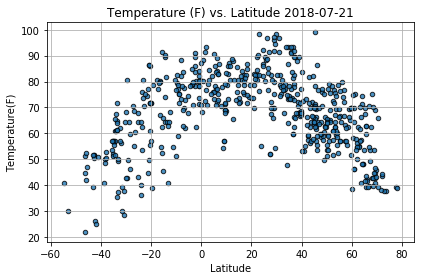

In [88]:
# Build a scatter plot - Temperature (F) vs. Latitude
today = time.strftime("%Y-%m-%d", time.localtime())
temp_plot = df_cities.plot(kind = "scatter", x ="Latitude", y = "Temperature(F)", marker = "o", 
                           title = "Temperature (F) vs. Latitude"+" "+today, alpha=.8,edgecolors="black",linewidths =1,grid = True)

plt.tight_layout()
# save figure
plt.savefig("Temperature vs.Latitude.png")
#show figure 
plt.show()

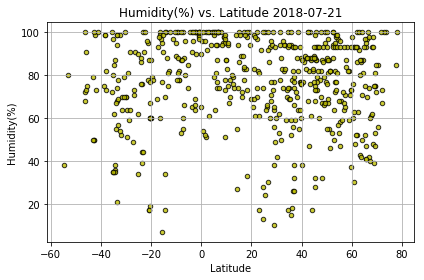

In [89]:
# Build a scatter plot - Humidity(%) vs. Latitude
humi_plot = df_cities.plot(kind = "scatter", x ="Latitude", y = "Humidity(%)", marker = "o", 
                           title = "Humidity(%) vs. Latitude"+" "+today, alpha=.8,edgecolors="black",linewidths =1, color = "y",grid = True)

plt.tight_layout()
# save figure
plt.savefig("Humidity vs.Latitude.png")
#show figure 
plt.show()

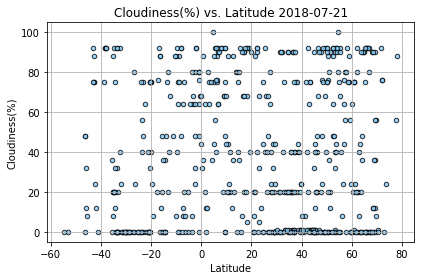

In [90]:
# Build a scatter plot - Cloudiness(%) vs. Latitude
cloud_plot = df_cities.plot(kind = "scatter", x ="Latitude", y = "Cloudiness(%)", marker = "o", 
                           title = "Cloudiness(%) vs. Latitude"+" "+today, alpha=.8,edgecolors="black",linewidths =1, color = "lightskyblue",grid = True)

plt.tight_layout()
# save figure
plt.savefig("Cloudiness vs.Latitude.png")
#show figure 
plt.show()

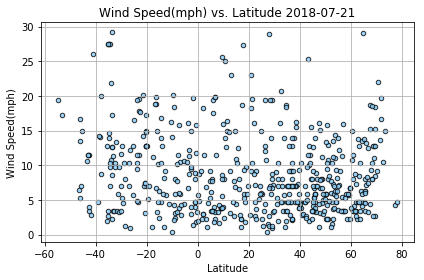

In [91]:
# Build a scatter plot - Wind Speed(mph) vs. Latitude
wind_plot = df_cities.plot(kind = "scatter", x ="Latitude", y = "Wind Speed(mph)", marker = "o", 
                           title = "Wind Speed(mph) vs. Latitude"+" "+today, alpha=.8,edgecolors="black",linewidths =1, color = "lightskyblue",grid = True)

plt.tight_layout()
# save figure
plt.savefig("Wind Speed vs.Latitude.png")
#show figure 
plt.show()